In [6]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(glmnet)
library(data.table)

In [7]:
df <- read.csv("datos_temprt.csv")
str(df)

'data.frame':	108464 obs. of  15 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 $ Cruise     : Factor w/ 180 levels "99-0           ",..: 29 29 29 29 29 29 29 29 29 29 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Day        : int  15 15 15 15 15 15 15 15 15 15 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Year       : int  1981 1981 1981 1981 1981 1981 1981 1981 1981 1981 ...
 $ Institute  : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Instrument : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Device     : Factor w/ 5 levels "CTD","MBT","OSD",..: 5 5 5 5 5 5 5 5 5 5 ...
 $ Sospechoso : int  NA NA NA NA NA NA NA NA NA NA ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...


In [20]:
dfT <- fread("datos_temprt.csv", select = c("Temperature", "Ts", "Depth", "Latitude", "Longitude", "Month",  "Cast"))
str(dfT)

Classes 'data.table' and 'data.frame':	108464 obs. of  7 variables:
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 - attr(*, ".internal.selfref")=<externalptr> 


In [33]:
library(repr)


### Temperatura Superficial

In [100]:
summary(dfT$Ts)
c("Correlación entre variable de respuesta", cor(dfT$Temperature, dfT$Ts))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.176  19.063  20.375  21.389  23.615  30.162 

[1] "Correlación entre variable de respuesta"
[2] "-0.155521304456749"

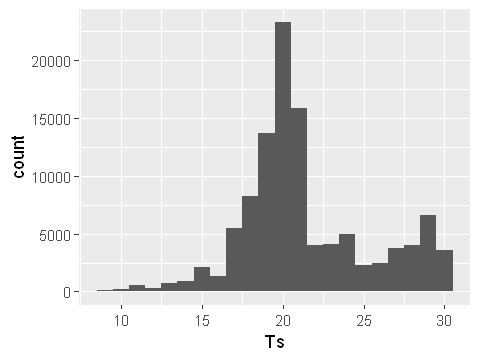

In [99]:
options(repr.plot.width=4, repr.plot.height=3)
ggplot(data = dfT) +
  geom_histogram(mapping = aes(x = Ts), binwidth = 1)

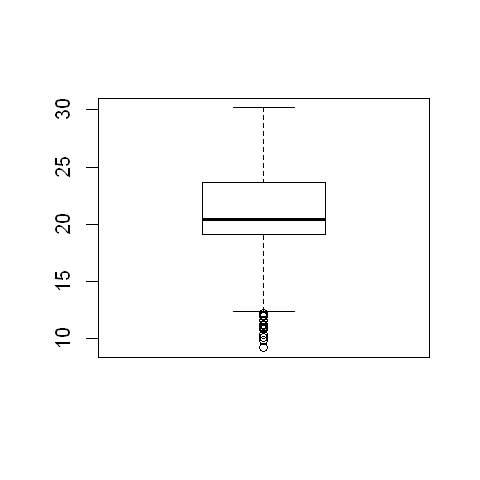

In [120]:
options(repr.plot.width=4, repr.plot.height=4)
boxplot(dfT$Ts)

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

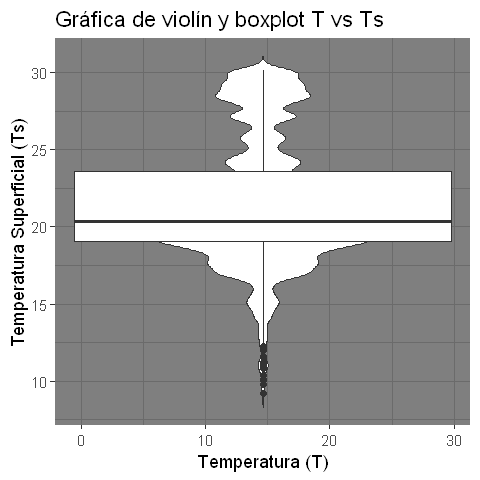

In [121]:
library(viridis)
vp1 <- ggplot(dfT, aes(x=Temperature, y=Ts)) + 
    geom_violin(trim=FALSE)+
    
    geom_boxplot(width=0.01, fill="white")+
    labs(title="Gráfica de violín y boxplot T vs Ts",x="Temperatura (T)", y = "Temperatura Superficial (Ts)")
vp1 + theme_dark()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


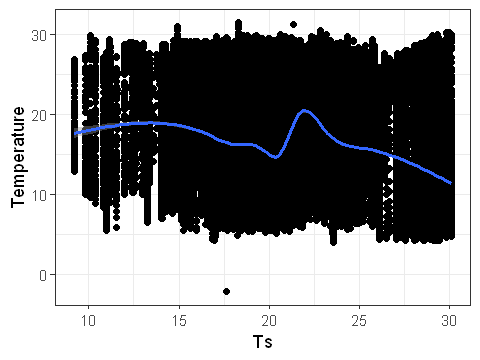

In [111]:
ggplot(data = dfT, mapping = aes(Ts, Temperature)) + geom_point() + geom_smooth() + theme_bw()

### Variable predictora Depth

In [103]:
summary(dfT$Depth)
c("Correlación entre variable de respuesta", cor(dfT$Depth, dfT$Temperature))

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   118.4   290.3   351.0   508.0  1990.8 

[1] "Correlación entre variable de respuesta"
[2] "-0.832131349128753"

Warning message:
"Continuous x aesthetic -- did you forget aes(group=...)?"

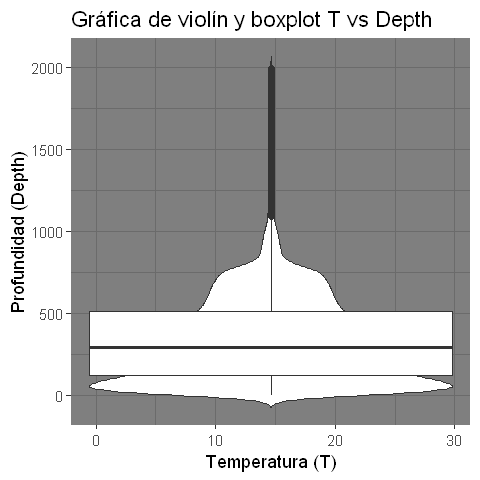

In [122]:
vp1 <- ggplot(dfT, aes(x=Temperature, y=Depth)) + 
    geom_violin(trim=FALSE)+
    
    geom_boxplot(width=0.01, fill="white")+
    labs(title="Gráfica de violín y boxplot T vs Depth",x="Temperatura (T)", y = "Profundidad (Depth)")
vp1 + theme_dark()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'


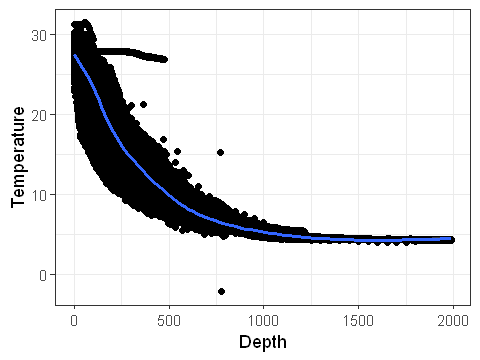

In [105]:

ggplot(data = dfT, mapping = aes(Depth, Temperature)) + geom_point() + geom_smooth() + theme_bw()

### Falta hacer para las demás variables y describir lo que se ve en las gráficas.

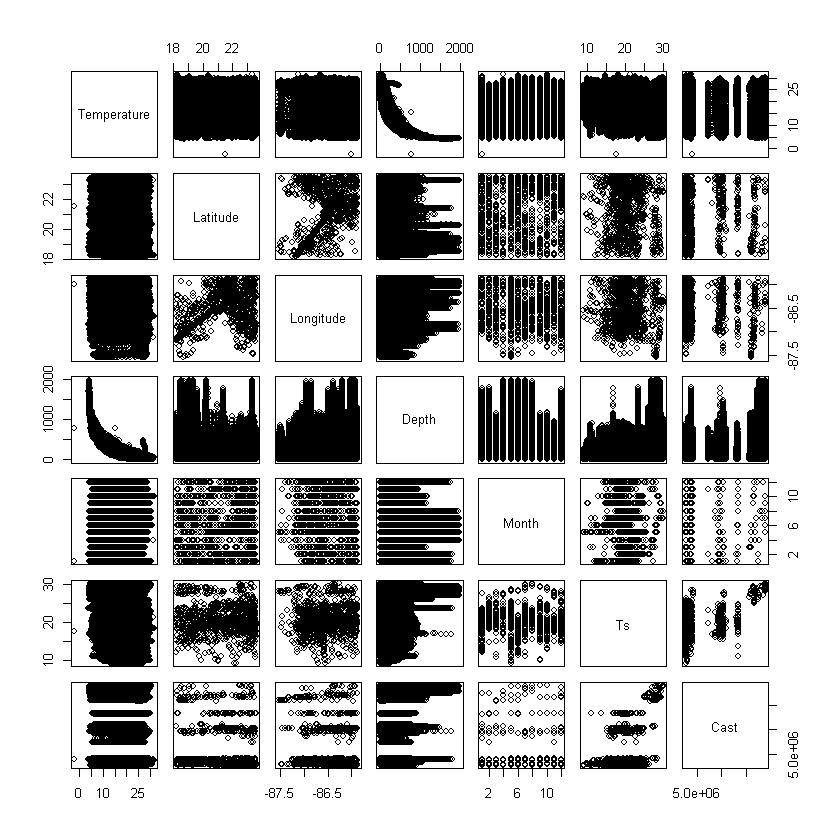

In [29]:
pairs(dfT)

### Se visualizan los cast respecto a las temperaturas tomadas en ese mismo registro

In [115]:
head(unique(dfT$Cast))

[1]  3678873  3679613  3679603  3681827  3681828 10268672

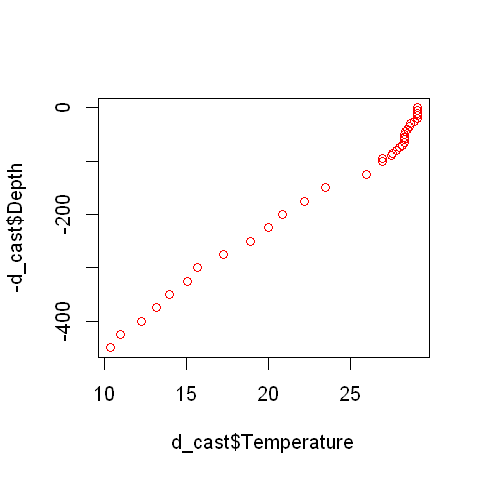

In [94]:
d_cast <- dfT[dfT$Cast == 3678873, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

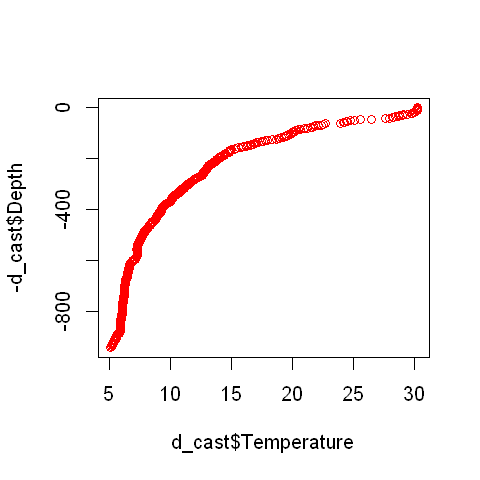

In [95]:
d_cast <- dfT[dfT$Cast == 18872763, c("Temperature", "Depth")]
plot(d_cast$Temperature, -d_cast$Depth, col="red")

In [113]:
str(dfT)

Classes 'data.table' and 'data.frame':	108464 obs. of  7 variables:
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 - attr(*, ".internal.selfref")=<externalptr> 


### Modelado estadístico 

Se aplica la regresión lineal múltiple sin transformaciones a las variables predictoras:


Call:
lm(formula = Temperature ~ Ts + Depth + Latitude + Longitude + 
    Month, data = dfT)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8985 -2.7628 -0.7294  2.3352 24.0693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.029e+02  3.141e+00   64.60   <2e-16 ***
Ts           1.309e-01  2.952e-03   44.36   <2e-16 ***
Depth       -2.179e-02  4.184e-05 -520.86   <2e-16 ***
Latitude    -1.050e+00  8.401e-03 -125.02   <2e-16 ***
Longitude    1.836e+00  3.601e-02   51.00   <2e-16 ***
Month       -8.754e-02  3.518e-03  -24.89   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.762 on 108458 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7404 
F-statistic: 6.187e+04 on 5 and 108458 DF,  p-value: < 2.2e-16


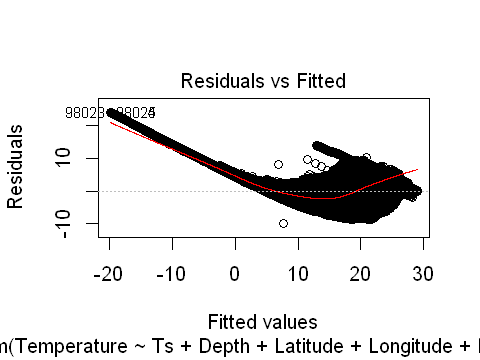

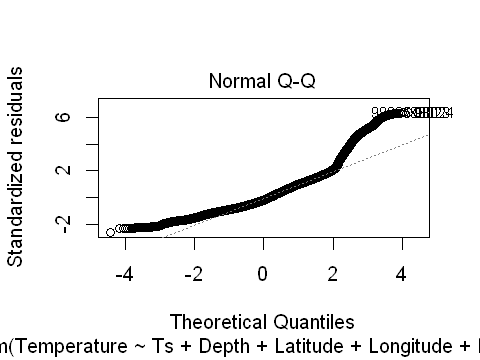

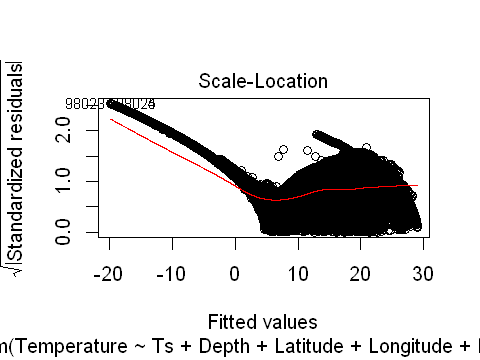

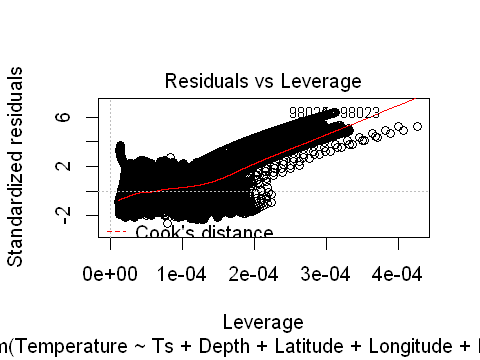

In [114]:
reg <- lm(Temperature ~ Ts + Depth + Latitude + Longitude  + Month , data = dfT)
summary(reg)
plot(reg)

## (Explicar las gráficas...)

# Sugerencias

* Considera explorar transformaciones polinomiales para la profundidad (variable $Depth$)
* Los polinomios de profundidad pueden depender de la latitud o de la longitud, por lo tanto, es recomendable que el modelo tenga términos de interacción entre las coordenadas geográficas y la profundidad.
* Determina la complejidad del modelo mediante validación cruzada (k-fold cross validation)
* Para la validación, puedes utilizar librerías especializadas de R: https://quantdev.ssri.psu.edu/tutorials/cross-validation-tutorial

base de datos con las variables de interés para el estudio, algunas de ellas fueron: 1) La temperatura que registró el dispositivo expresada en grados Celsius 2) La profundidad a la cual se tomó la medición expresada en metros, 3) La latitud y la longitud expresadas en el sistema de coordenadas geográficas WGS84, 4) La fecha de la medición (día, mes y año), 5) Tipo de instrumento de medición y  6) El promedio mensual de la temperatura superficial.